In [1]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation, Birch, KMeans, DBSCAN, MiniBatchKMeans, \
    MeanShift
import matplotlib.pyplot as plt
from Data_Treatment import StockData, StockData_1
from datetime import datetime
import matplotlib._color_data as mcd
from random import choices, seed

In [2]:
seed(1)
colors = choices(list(mcd.CSS4_COLORS), k=20)

StockData = StockData_1("WIN$", 10, 1)
StockData.stockdata(5, datetime.today(), 200)

X = StockData.train_x.reshape(StockData.train_x.shape[0], -1)
x_test = StockData.train_x_today.reshape(StockData.train_x_today.shape[0], -1)
y_test = StockData.scaler_y.inverse_transform(StockData.train_y_today)

C:\Users\mueld\Documents\Python_Projects\reinforcement-learning-using-python-master\FinIndicator.py:57: RuntimeWarning: invalid value encountered in double_scalars
  array_highest[x - kperiods] - array_lowest[x - kperiods]))
C:\Users\mueld\Documents\Python_Projects\reinforcement-learning-using-python-master\FinIndicator.py:57: RuntimeWarning: invalid value encountered in double_scalars
  array_highest[x - kperiods] - array_lowest[x - kperiods]))
C:\Users\mueld\Documents\Python_Projects\reinforcement-learning-using-python-master\FinIndicator.py:57: RuntimeWarning: invalid value encountered in double_scalars
  array_highest[x - kperiods] - array_lowest[x - kperiods]))
C:\Users\mueld\Documents\Python_Projects\reinforcement-learning-using-python-master\FinIndicator.py:57: RuntimeWarning: invalid value encountered in double_scalars
  array_highest[x - kperiods] - array_lowest[x - kperiods]))


ValueError: Length of values (10) does not match length of index (1)

In [3]:
x_test.shape

(1002, 100)

In [4]:
# define the model
# model = AffinityPropagation()
model = KMeans()  # k=34/1126 | k=14/1943 | k=7/2367
# model = Birch(threshold=0.01)  # k=28/1236 | k=11/1624
# model = AgglomerativeClustering()  # k=18/1887 | k=7/2443
# model = MiniBatchKMeans()  # k=35/1543 | k=11/2101

In [5]:
model.fit(X)
yhat = model.predict(x_test)
clusters = unique(yhat)

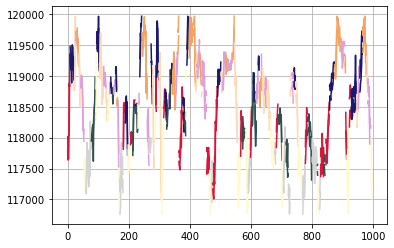

In [6]:
fig, ax = plt.subplots()
s = -1
lin2d = []
mx = 0
ini = 0
for i, h in enumerate(yhat):
    if s != h:
        ax.plot(lin2d, y_test[ini:i, 0], c=colors[s])
        ax.plot(lin2d, y_test[ini:i, 1], c=colors[s])
        lin2d = []
        ini = i
    lin2d.append(i)
    s = h

ax.grid(True)
plt.show()